In [23]:
%matplotlib inline
import math
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread("/Users/xavierochoa/calc2.png",0)          # queryImage
img2 = cv2.imread("/Users/xavierochoa/todo.png",0)          # trainImage

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

error: /usr/src/build/opencv/modules/imgproc/src/color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [24]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

error: /usr/src/build/opencv_contrib/modules/xfeatures2d/src/sift.cpp:770: error: (-5) image is empty or has incorrect depth (!=CV_8U) in function detectAndCompute


In [6]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

In [7]:
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [8]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    TM=cv2.estimateRigidTransform(src_pts, dst_pts,False)
    newrow = [0,0,1]
    TM = np.vstack([TM, newrow])

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,TM)

    cv2.polylines(img2,[np.int32(dst)],True,(255,255,255),10)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)

In [9]:
degree = math.degrees(math.acos(TM[0][0]))

In [10]:
centerx = (dst[0][0][0]+dst[2][0][0])/2
centery = (dst[0][0][1]+dst[2][0][1])/2
cv2.circle(img2, (np.int32(centerx),np.int32(centery)), 10, (255,255,255),10) 

In [11]:
student = 0
height,width = img2.shape
n = (centery) - (math.tan(math.pi/2-math.acos(TM[0][0])) * (width-centerx))
x0=(-n)/math.tan(math.radians(90-degree))
if x0>-1 and x0<width+1:
    if x0<180:
        student = 1
    if x0>179 and x0<701:
        student = 2
    if x0>700:
        student = 3
else:
    if x0<0:
        student = 1
    if x0>width:
        student = 3

cv2.line(img2, (np.int32(centerx),np.int32(centery)), (np.int32(width-x0),0), (255,255,255),10)

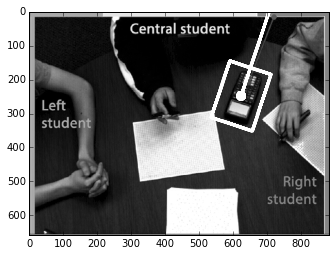

In [12]:
img2show = cv2.cvtColor(img2, cv2.cv.CV_GRAY2RGB)
plt.imshow(img2show)

In [ ]:
student